# K-means clustering: Bài toán phân nhóm chữ số viết tay với CSDL MNIST

In [9]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

data_dir = './data'
mnist = fetch_openml('mnist_784', version=1, data_home=data_dir)
print("Shape of MINST data: ", mnist.data.shape)

/Users/tieuphuong/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of MINST data:  (70000, 784)


TypeError: 'float' object cannot be interpreted as an integer

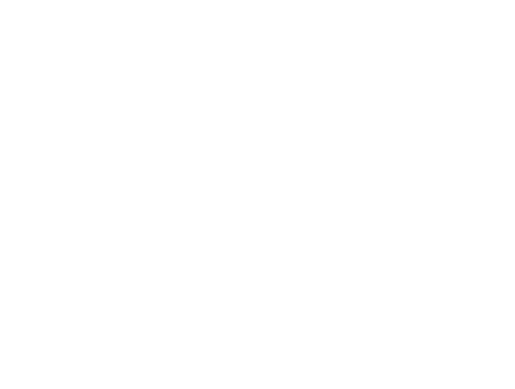

In [11]:
from display_network import *
from matplotlib.backends.backend_pdf import PdfPages

plt.axis('off')
A = display_network(X.T, 10, N/10)
f2 = plt.imshow(A, interpolation = 'nearest')
plt.gray()
plt.savefig('mnist_ex.png', bbox_inches = 'tight', dpi = 600)
plt.show()

##### Lấy ra ngẫu nhiên 10000 ảnh từ CSDL MNIST và thực hiện K-means cluster
Các centroid được lưu trong `kmeans.cluster_centers_`, label mỗi điểm dữ liệu được lưu trong `pred_label`.

In [10]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
K = 10
N = 10000
X = mnist.data.sample(N)
kmeans = KMeans(n_clusters = K).fit(X)
pred_label = kmeans.predict(X)

/Users/tieuphuong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

K = 10              # number of clusters
N = 10000           # number of samples
X = mnist.data[np.random.choice(mnist.data.shape[0], N)]
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

In [ ]:
plt.axis('off')
A = display_network(kmeans.cluster_centers_.T, 10, 1)
f2 = plt.imshow(A, interpolation='nearest', cmap = plt.cm.jet)

plt.savefig('mnist_centroids.png', bbox_inches = 'tight', dpi = 600)
plt.show()

In [8]:
N0 = 10
K = 10
X1 = np.zeros((N0 * K, 784))
X2 = np.zeros((N0 * K, 784))

for k in range(K):
    Xk = X[pred_label == k, :]

    # random points in each cluster
    X1[N0*k : N0*k + N0, :] = Xk[:N0, :]

    # NO nearest points
    centroid_k = kmeans.cluster_centers_[k]
    neigh = NearestNeighbors(N0) # get 5 nearest neighbors
    neigh.fit(Xk)

    X2[N0*k : N0*k + N0, :] = Xk[neigh.kneighbors(centroid_k, N0)[1][0], :]

InvalidIndexError: (array([ True, False, False, ..., False, False, False]), slice(None, None, None))

In [ ]:
# random point in cluster
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation = 'nearest')
plt.gray()
plt.savefig('mnist_cluster_random.png', bbox_inches = 'tight', dpi = 600)
plt.show()

In [ ]:
# nearest points
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation = 'nearest')
plt.gray()
plt.savefig('mnist_cluster_nn.png', bbox_inches = 'tight', dpi = 600)
plt.show()